In [5]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os

In [7]:
os.chdir('C:\\Users\\kandanulus\\MyTestlab\\DPL')

In [8]:
data = pd.read_csv('loan_data.csv')

In [9]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
data.['not.fully.paid'].value_count()

SyntaxError: invalid syntax (60662000.py, line 1)

In [14]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


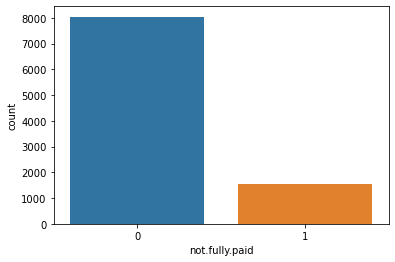

In [15]:
sns.countplot(x=data['not.fully.paid'])
plt.show()

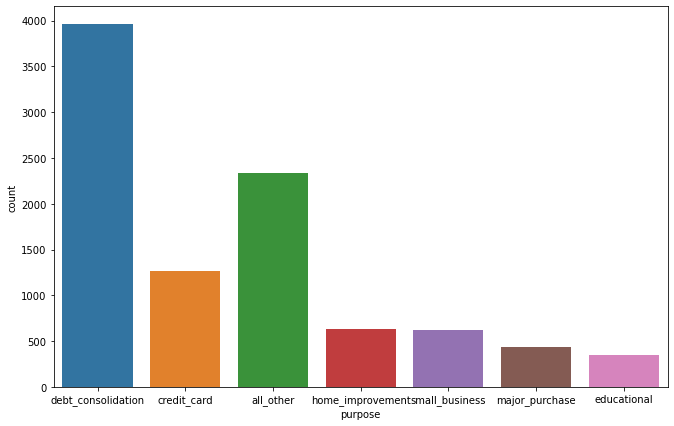

In [16]:
plt.figure(figsize=(11,7))
sns.countplot(x=data['purpose'])
plt.show()

<AxesSubplot:xlabel='purpose', ylabel='count'>

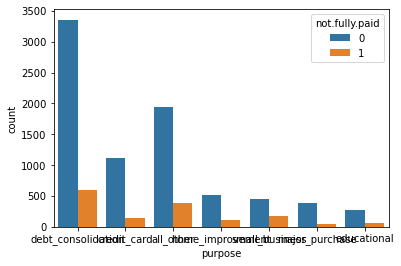

In [17]:
sns.countplot(data=data,x='purpose',hue='not.fully.paid')

In [18]:
pd.crosstab(df['purpose'],df["not.fully.paid"]).plot(figsize=(10,5),kind='bar',stacked=True)
plt.show()

NameError: name 'df' is not defined

In [19]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

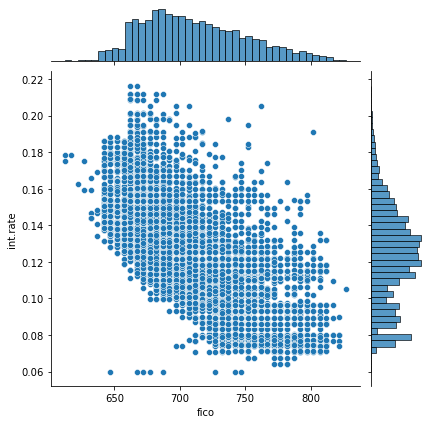

In [21]:
sns.jointplot(x='fico', y='int.rate', data=data)

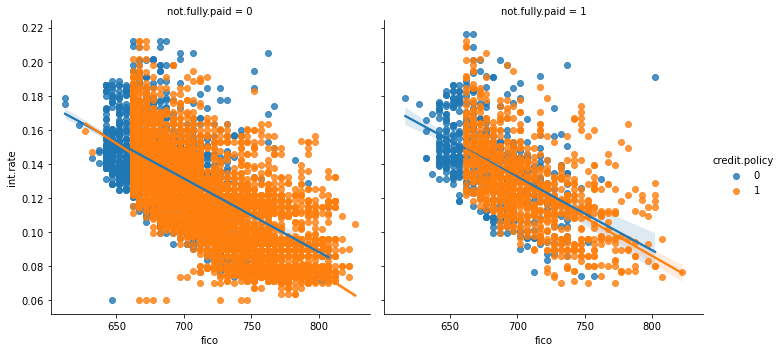

In [22]:
sns.lmplot(x='fico',y='int.rate',data=data,hue='credit.policy',col='not.fully.paid')

In [ ]:
# Feature Engineering
# handle imbalance Dataset

In [25]:
not_fully_paid_0=data[data['not.fully.paid']==0]
not_fully_paid_1=data[data['not.fully.paid']==1]

In [27]:
not_fully_paid_0.shape

(8045, 14)

In [28]:
not_fully_paid_1.shape

(1533, 14)

In [30]:
#resample
from sklearn.utils import resample
df_minor_upsample = resample(not_fully_paid_1,replace = True, n_samples=8045)

In [32]:
new_df=pd.concat([not_fully_paid_0,df_minor_upsample])

In [33]:
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [34]:
new_df['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

In [37]:
#Feature Transformation

In [39]:
#Tranform alphanumeric to numberic (discret)

In [40]:
#apply label Encoding

In [41]:
new_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=le.fit_transform(new_df[i])

In [44]:
new_df.dtypes

credit.policy          int64
purpose                int32
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

#Additional Feature Engineering

#You will check the correlation between features and will drop those features which have a strong correlation

#This will help reduce the number of features and will leave you with the most relevant features

<AxesSubplot:>

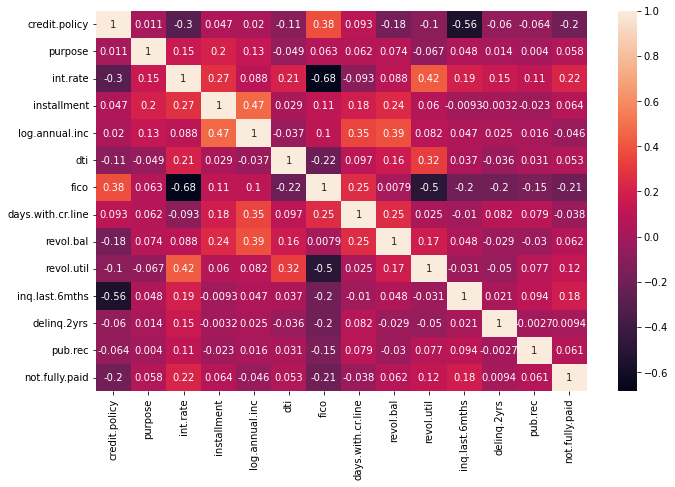

In [45]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(),annot=True)

In [47]:
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.219310
fico                 0.214439
credit.policy        0.198442
inq.last.6mths       0.175818
revol.util           0.124588
installment          0.063980
revol.bal            0.061543
pub.rec              0.060849
purpose              0.057610
dti                  0.052950
log.annual.inc       0.045718
days.with.cr.line    0.037905
delinq.2yrs          0.009373
Name: not.fully.paid, dtype: float64

In [48]:
X=new_df[['credit.policy', 'purpose', 'int.rate', 'installment','dti', 'fico', 'revol.bal', 'revol.util',
       'inq.last.6mths','pub.rec']]

In [49]:
X.shape

(16090, 10)

In [50]:
y=new_df[['not.fully.paid']]

In [52]:
y.shape

(16090, 1)

In [54]:
# Create train set & test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
# Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [58]:
X_train

array([[ 0.58213469, -0.0034503 , -0.48309136, ...,  0.514955  ,
        -0.75210036, -0.26577733],
       [-1.71781551, -1.14222672,  1.25137667, ..., -1.40075424,
         0.86558463, -0.26577733],
       [ 0.58213469,  2.27410253,  1.00092547, ...,  1.31087017,
        -0.75210036, -0.26577733],
       ...,
       [-1.71781551,  0.56593791,  1.27754322, ...,  0.14283882,
         0.86558463, -0.26577733],
       [ 0.58213469,  2.27410253,  2.81015505, ...,  0.34957003,
        -0.34767911,  3.40098133],
       [ 0.58213469, -1.14222672, -1.38770615, ..., -1.69017794,
        -0.75210036, -0.26577733]])

#In this part, you will create a deep learning model using Keras with Tensorflow backend

In [59]:
X_test

array([[-1.71781551, -0.0034503 , -1.03632685, ..., -0.30507881,
         0.86558463, -0.26577733],
       [ 0.58213469, -0.0034503 , -1.83627547, ..., -1.11477606,
        -0.75210036, -0.26577733],
       [ 0.58213469, -1.14222672, -0.56532907, ...,  0.03258217,
         0.46116339, -0.26577733],
       ...,
       [ 0.58213469, -0.57283851,  0.44768998, ...,  0.04636425,
         0.46116339, -0.26577733],
       [ 0.58213469,  2.27410253,  0.60095116, ...,  0.58041988,
         0.46116339, -0.26577733],
       [-1.71781551, -0.0034503 ,  0.30564302, ..., -1.24915135,
         0.86558463, -0.26577733]])

In [99]:
import tensorflow

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
!pip install --upgrade pip

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\kandanulus\Anaconda3\python.exe -m pip install --upgrade pip


In [5]:
#!pip install grpcio==1.24.3
!pip install tensorflow

In [ ]:
# Keras Tuner - Hyparparameter Tuning

In [6]:
!pip install keras-tuner --upgrade

     ------------------------------------ 135.7/135.7 kB 536.1 kB/s eta 0:00:00


In [7]:
import keras_tuner

In [103]:
def build_model(hp):
  model=Sequential()
  #first hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh']),input_shape=[10]))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
  #second hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh'])))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
  #Third hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh'])))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
    #output layer
  model.add(Dense(1,activation='sigmoid'))
  learning_rate=hp.Float('learning_rate',min_value=0.001,max_value=0.1,step=0.01)
  # compile the model
  model.compile(loss='binary_crossentropy',
                optimizer=tensorflow.keras.optimizers.Adam(learning_rate),
                metrics=['accuracy'])
  return model

In [104]:
import keras_tuner as kt
build_model(kt.HyperParameters())

NameError: name 'BatchNormalization' is not defined

In [ ]:
rtuner=kt.RandomSearch(hypermodel=build_model,
                       objective='val_accuracy',
                       max_trials=3,
                       executions_per_trial=2,
                       overwrite=True
                       )